In [1]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

import csv

# Create an empty 2D NumPy array with shape (122, 121)
data = np.empty((122, 121), dtype=np.int32)

# Open the CSV file and read the data into the array
with open('output_bin.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(reader):
        data[i] = np.array(row, dtype=np.int32)

# Extract the desired sub-matrix with shape (121, 121)
X = data[:121, :121]

m, n = X.shape
print(f" m = {m}, n= {n}")
print ('The shape of X is: ' + str(X.shape))
print ('The first element of X is: \n', X[0])

# Print the matrix to verify it was read correctly
print(X)


 m = 121, n= 121
The shape of X is: (121, 121)
The first element of X is: 
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]
[[1 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 1]]


In [2]:
data = np.empty((121,), dtype=np.int32)

# Open the CSV file and read the data into the array
with open('labels_bin.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(reader):
        data[i] = int(row[0])

# Reshape the 1D array into a column vector with shape (121, 1)
Y = data.reshape((121, 1))


m, n = Y.shape
print(f" m = {m}, n= {n}")
print ('The shape of X is: ' + str(Y.shape))
print ('The first element of Y is: \n', Y[0])

# Print the matrix to verify it was read correctly
print(Y)

 m = 121, n= 1
The shape of X is: (121, 1)
The first element of Y is: 
 [0]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


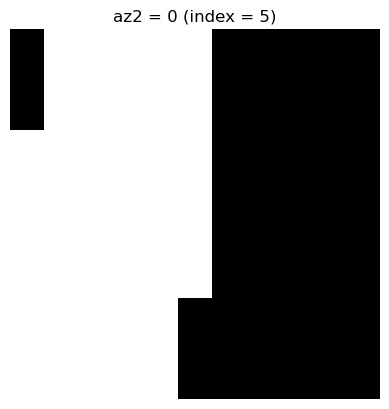

In [25]:
m, n = X.shape

index = 5 # np.random.randint(m)   
Q = X[index].reshape((11,11)).T
plt.imshow(Q, cmap='gray')
plt.title(Y[index,0])
plt.title(f"az2 = {Y[index,0]} (index = {index})")
plt.axis('off')
plt.show()

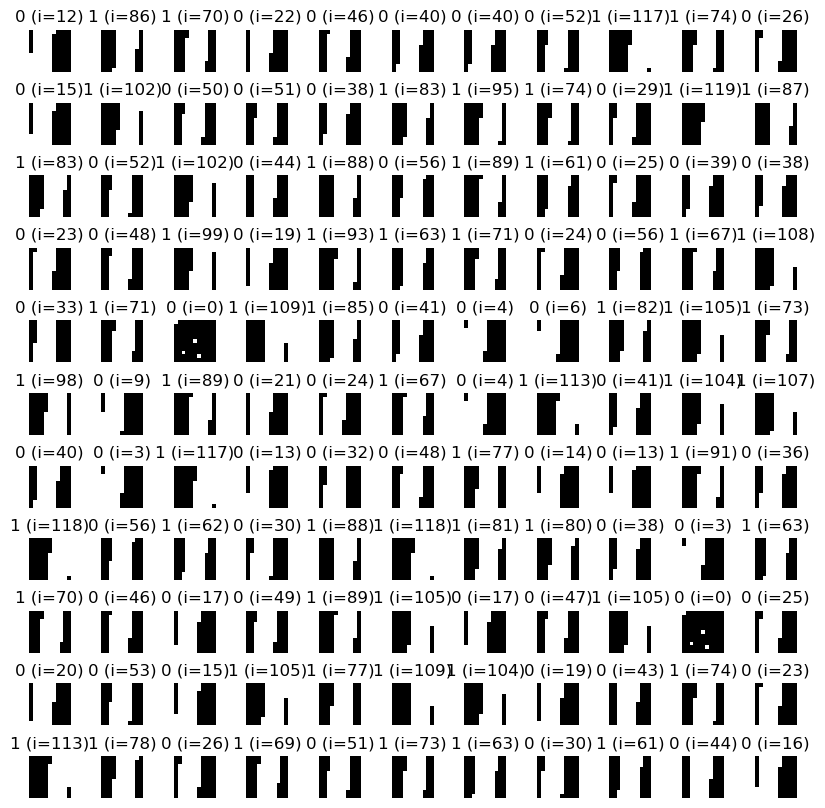

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(11,11, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    Q = X[index].reshape((11,11)).T
    
    # Display the image
    ax.imshow(Q, cmap='gray')
    
    # Display the label above the image
    ax.set_title(f"{Y[index,0]} (i={index})")
    ax.set_axis_off()

In [5]:
model = Sequential(
    [               
        tf.keras.Input(shape=(121,)),    #specify input size
        ### START CODE HERE ### 
        tf.keras.layers.Dense(25, activation="sigmoid"),
        tf.keras.layers.Dense(15, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ### END CODE HERE ### 
    ], name = "my_model" 
)       

Metal device set to: Apple M1 Max


2023-03-07 11:10:14.825455: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-07 11:10:14.825587: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                3050      
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 3,456
Trainable params: 3,456
Non-trainable params: 0
_________________________________________________________________


In [7]:
L1_num_params = 121 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  3050 , L2 params =  390 ,  L3 params =  16


In [8]:
[layer1, layer2, layer3] = model.layers

In [9]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (121, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [10]:
print(model.layers[2].weights)

[<tf.Variable 'dense_2/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.23050562],
       [ 0.39968485],
       [ 0.22651118],
       [-0.60415554],
       [ 0.35210818],
       [-0.13392451],
       [-0.25397468],
       [ 0.60278183],
       [ 0.56106085],
       [ 0.06887126],
       [-0.41070235],
       [-0.4476968 ],
       [-0.45034045],
       [ 0.04263318],
       [ 0.08683658]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [11]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [12]:

model.fit(
    X,Y,
    epochs=80
)

Epoch 1/80


2023-03-07 11:10:14.977133: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-07 11:10:15.105006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 72ms/step - loss: 0.6872
Epoch 2/80
4/4 [==============================] - 0s 7ms/step - loss: 0.6632
Epoch 3/80
4/4 [==============================] - 0s 7ms/step - loss: 0.6399
Epoch 4/80
4/4 [==============================] - 0s 6ms/step - loss: 0.6173
Epoch 5/80
4/4 [==============================] - 0s 7ms/step - loss: 0.5944
Epoch 6/80
4/4 [==============================] - 0s 7ms/step - loss: 0.5717
Epoch 7/80
4/4 [==============================] - 0s 7ms/step - loss: 0.5490
Epoch 8/80
4/4 [==============================] - 0s 7ms/step - loss: 0.5256
Epoch 9/80
4/4 [==============================] - 0s 7ms/step - loss: 0.5030
Epoch 10/80
4/4 [==============================] - 0s 7ms/step - loss: 0.4810
Epoch 11/80
4/4 [==============================] - 0s 6ms/step - loss: 0.4591
Epoch 12/80
4/4 [==============================] - 0s 7ms/step - loss: 0.4382
Epoch 13/80
4/4 [==============================] - 0s 7ms/step - loss: 0.4178
Epoch

In [13]:
prediction = model.predict(X[0].reshape(1,121))  # a zero
print(f" predicting a zero: {prediction}")

1/1 [==============================] - 0s 75ms/step
 predicting a zero: [[0.32352015]]


2023-03-07 11:10:17.733830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [14]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")


prediction after threshold: 0


1/1 [==============================] - 0s 8ms/step


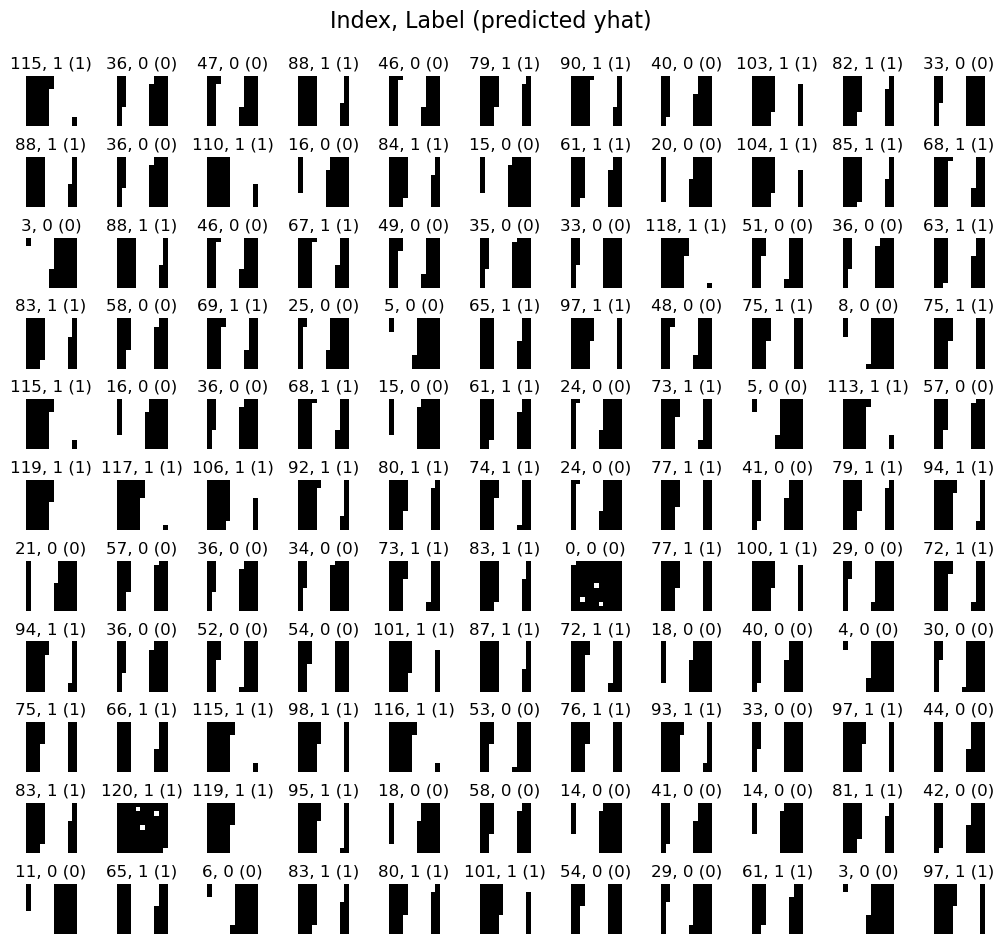

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(11,11, figsize=(10,10))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]


for i,ax in enumerate(axes.flat):
    # Select random indices
    index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    Q = X[index].reshape((11,11)).T
    
    # Display the image
    ax.imshow(Q, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[index].reshape(1,121))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{index}, {Y[index,0]} ({yhat})")
    ax.set_axis_off()
fig.suptitle("Index, Label (predicted yhat)", fontsize=16)
plt.show()